# Week Four: Random numbers

To be graded, your notebook must be runnable start to finish. If you can't make an in-notebook test pass, comment it out for to attempt to get partial credit. You should replace the `...` markers with your code. Do not change the names of the pre-defined ALL_CAPS variables and functions. (If you start from scratch, make sure you match the requested function names and requested ALL_CAPS variables). Other that that, you are free to define or make anything you wish. Remember that functions will often be tested with different numbers than the ones you are given.

This notebook will also be graded for plots - please make sure you save the notebook with the plots present, just in case I have a problem running them. If you change to the notebook backend (or any other backend), I recommend changing back to inline and re-running before saving the file - some of the more interactive backends don't get captured in the saved file.

In [5]:
# EID is your 6+2 UC Electronic ID
EID = '800256578'
NAME = 'Jack Powers'

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D plots

## Problem 1: Random number generation

#### 1.1: Linear congruent generator

Implement the linear congruent random number generator. It's okay to use the iterator system in the lecture notes if you understand it, or you can implement your own without iterators. The **function** you write as an answer should return a numpy array.

<font color="grey">
> Hint if you use iterators: to save a bit of time and memory, you can use
> ```python
> arr = np.fromiter(lin_cong_iter(...), dtype=...)
> ```
> to skip turning an iterator into a list before calling array instead of
> ```python
> arr = np.array(list(lin_cong_iter(...)))
> ```
> 

In [7]:
# Optional ...

def linear_cong(c, a, M, r_0):
    r = r_0
    random_array = []
    random_array.append(r)
    for i in range(0, M-1):
      r = (c + (a*r)) % M
      random_array.append(r)
    return np.array(random_array)

In [8]:
assert np.all(linear_cong(1,4,9,3) == np.array([3, 4, 8, 6, 7, 2, 0, 1, 5]))

## 1.2: Generator plot tests

Let's see if the following value make good random number sequences:

In [9]:
values_a = linear_cong(c=57, a=1, M=256, r_0=10)
values_b = linear_cong(c=1, a=57, M=256, r_0=10)
values_c = linear_cong(c=199, a=109, M=256, r_0=10)
values_d = np.arange(256)
np.random.seed(42)
np.random.shuffle(values_d)

For each of the four sequences listed above, plot y vs. x $\rightarrow$ $r_{2i}$ vs. $r_{2i+1}$, where $r$ is a random sample and index $2i$ is even (Figure 5.1 in the book). Don't connect the dots in the plot! You should set up a function that does the plotting for you. It's up to you on how much to put in the function, and how much to do outside. Add axis labels and a title that includes "a", "b", "c", or "d", depending on the sample. This answer does not need to match a special pattern, I'll be grading it by eye. Personally, I made a 2x2 suplots grid then ran my function on each axes. Since the default spacing was awful, I called `plt.tight_layout()` after making the plots.

In [10]:
def plotting(values):
  for r in values:
    x = []
    y = []
    for i in range(0,len(values)-2):
      if (i % 2 == 0):
        x.append(values[i])
      else:
        y.append(values[i+1]) 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y, 'o')

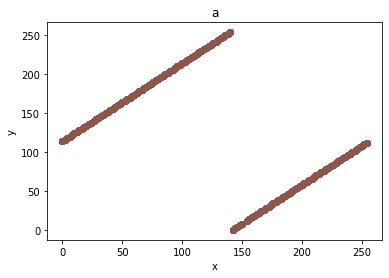

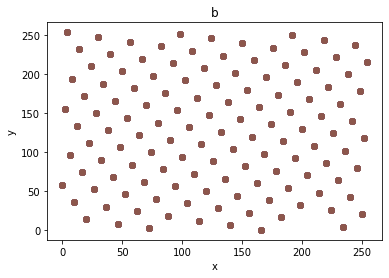

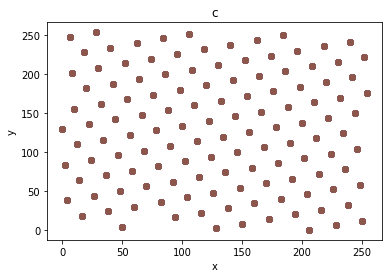

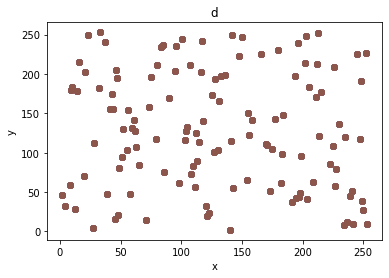

In [11]:
values = [values_a, values_b, values_c, values_d]

fig1 = plt.figure(1)
plotting(values[0])
plt.title('a')
plt.show()

fig2 = plt.figure(2)
plotting(values[1])
plt.title('b')
plt.show()

fig3 = plt.figure(3)
plotting(values[2])
plt.title('c')
plt.show()

fig4 = plt.figure(4)
plotting(values[3])
plt.title('d')
plt.show()




### 1.3: Deviations from uniformity

Write a function to compute the $k$th moment of a random number sequence. We'll then test the standard random number generator from Numpy with it.

$$
\frac{1}{N} \sum_{i=1}^{N} x^{k}_{i}
$$

In [12]:
def moment(distribution, k):
  return ((1/len(distribution)) * np.sum(distribution ** k))

In [13]:
print('Should be around 1/2: k=1: ', moment(np.random.rand(100_000), 1))
print('Should be around 1/3: k=1: ', moment(np.random.rand(100_000), 2))
print('Should be around 1/4: k=1: ', moment(np.random.rand(100_000), 3))

Should be around 1/2: k=1:  0.5009985940154307
Should be around 1/3: k=1:  0.3333094015738327
Should be around 1/4: k=1:  0.2507988349099685


If this is truly random, the distribution of many trials should vary roughly as $1/\sqrt{N}$:

9.673874847346574e-06


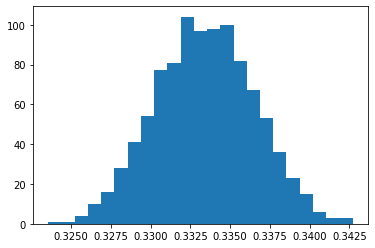

In [14]:
trials = [moment(np.random.rand(10_000), 2) for _ in range(1000)]
print(np.var(trials))
plt.hist(trials, bins='auto');

## Problem 2: A 3D random walk

In class I showed you how to do a 2D random walk. Let's try a 3D one. You can either return 3 length N arrays (x, y, and z), or a [3,N] array with all three dimensions (the function can be done cleanly in 3-5 lines this way
). Due to the way iteration over arrays was implemented, unpacking will work exactly the same in both cases so you'll have the same user interface. The radius should be consistently 1. Use the same generation in $\Delta x$, etc. that was used even though the directions will be slightly unevenly distributed.

In [15]:
import math
def rwalk3D(size):
  x = [0]
  y = [0]
  z = [0]
  for i in range(0,size):
    randvar = (np.random.random(3) - 0.5) * 2
    l = np.sqrt(np.sum(randvar**2))
    x.append((randvar[0] + x[i]))
    y.append((randvar[1] + y[i]))
    z.append((randvar[2] + z[i]))
    
    

  np.array(x)
  np.array(y)
  np.array(z)

  return x, y, z

Here's a quick plot to see how you did:

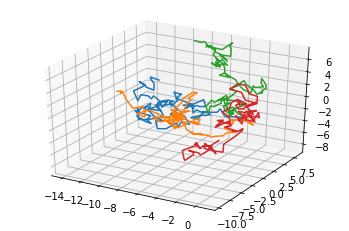

In [16]:
np.random.seed(41)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*rwalk3D(100))
ax.plot(*rwalk3D(100))
ax.plot(*rwalk3D(100))
ax.plot(*rwalk3D(100))
plt.show()

Build a function that computes N values from N random walks of length `size`, and then outputs an N length array with the results of those trials. You can reuse your function above, or rewrite it - cumulative summing wastes time and memory if you only need the final sum.

Note, if you want, you can even do this without a Python loop - you can make a 3D array, `[3, N_trials, size]`, and do everything on that! But you'll have to be careful when summing to select the right axes, and you'll need to organize things to make the division work with broadcasting.

In [17]:


def rwalk3Dsum(size, N_trials):
  distance = []
  for i in range(0, N_trials):
        x = [0]
        y = [0]
        z = [0]
        for i in range(0,size):
          randvar = (np.random.random(3) - 0.5) * 2
          l = np.sqrt(np.sum(randvar**2))
          x.append((randvar[0] + x[i]))
          y.append((randvar[1] + y[i]))
          z.append((randvar[2] + z[i]))
          
          

          

        np.array(x)
        np.array(y)
        np.array(z)

        total_distance = np.sum(np.sqrt((x[i]**2) + (y[i]**2) + (z[i]**2)))
        

        distance.append(total_distance)
  return(distance)


Let's just verify that we get reasonalble results. 100 steps should give us a width of about 10.

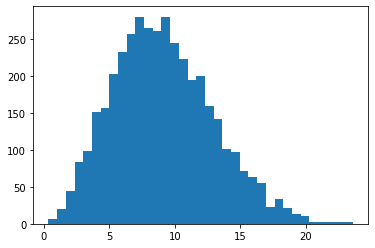

In [18]:
plt.hist(rwalk3Dsum(100, 4000), bins='auto');

## Problem 3: Particle decay

Write a function that produces a histogram of decay times for a collection of particles, given an initial number of particles, a decay probability, and a number of time bins to calculate. You should build the histogram array directly instead of using the method I used in class; this way you skip building up a list. Just start with an array initialized to 0 then add to the correct time bin every time a particle decays. You can avoid the inner loop if you wish by using arrays, but you can't easily avoid the outer loop since each step depends on the number of particles left after the previous step.

In [19]:
def decay_bins(particles, decay_prob, bins):
  ...

ValueError: ignored

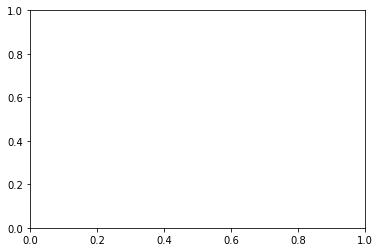

In [20]:
np.random.seed(42)
fig, ax = plt.subplots()
x = np.arange(500)

ax.plot(decay_bins(particles=1_000, decay_prob=0.01, bins=500))
ax.plot(0.01*1_000*np.exp(-0.01*x), 'k')

ax.plot(decay_bins(particles=3_000, decay_prob=0.01, bins=500))
ax.plot(0.01*3_000*np.exp(-0.01*x), 'k')

ax.plot(decay_bins(particles=10_000, decay_prob=0.01, bins=500))
ax.plot(0.01*10_000*np.exp(-0.01*x), 'k')

ax.plot(decay_bins(particles=30_000, decay_prob=0.01, bins=500))
ax.plot(0.01*30_000*np.exp(-0.01*x), 'k')

ax.set_yscale('log');